In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
data=pd.read_csv("/kaggle/input/beer-consumption-sao-paulo/Consumo_cerveja.csv")

In [3]:
data.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [4]:
data.shape

(941, 7)

In [5]:
data.describe()

,Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [7]:
data.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [8]:
data.isnull().any()

Data                           True
Temperatura Media (C)          True
Temperatura Minima (C)         True
Temperatura Maxima (C)         True
Precipitacao (mm)              True
Final de Semana                True
Consumo de cerveja (litros)    True
dtype: bool

In [9]:
data.dropna(how="all",inplace=True)

In [10]:
data.replace({",":"."},regex=True,inplace=True)

In [11]:
data.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900


In [12]:
data["Data"]=pd.to_datetime(data["Data"])

In [13]:
days=["Monday","Tuesdat","Wednesday","Thursday","Friday","Saturday","Sunday"]

In [14]:
data["Day"]=data["Data"].apply(lambda a : days[a.weekday()])

In [15]:
data.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Day
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461,Thursday
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972,Friday
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814,Saturday
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,Sunday
4,2015-01-05,23.82,21,28.3,0,0.0,28.900,Monday


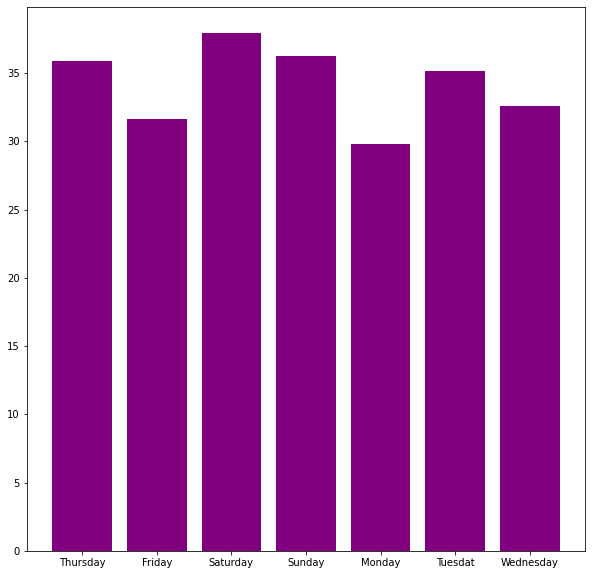

In [16]:
plt.figure(figsize=(10,10))
plt.bar(data["Day"],data["Consumo de cerveja (litros)"],color="purple")
plt.show()

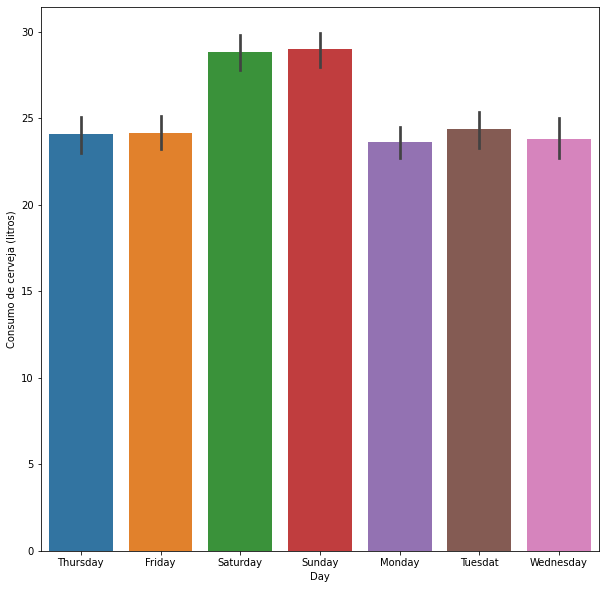

In [17]:
plt.figure(figsize=(10,10))
sns.barplot(x="Day",y="Consumo de cerveja (litros)",data=data)
plt.show()

# Box Plot

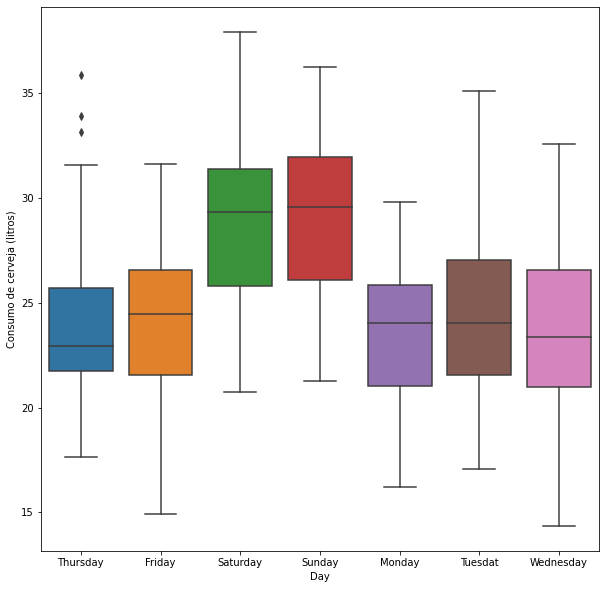

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Day", y="Consumo de cerveja (litros)", data=data)
plt.show()

In [19]:
data.drop(["Data","Day"],axis=1,inplace=True)

In [20]:
data.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,27.3,23.9,32.5,0,0.0,25.461
1,27.02,24.5,33.5,0,0.0,28.972
2,24.82,22.4,29.9,0,1.0,30.814
3,23.98,21.5,28.6,1.2,1.0,29.799
4,23.82,21,28.3,0,0.0,28.900


# converting temperature and rainfall columns into float type

In [21]:
data=data.apply(pd.to_numeric)

In [22]:
cf_matrix=data.corr()

In [23]:
cf_matrix.style.background_gradient(cmap='gist_rainbow_r').set_precision(2)

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Temperatura Media (C),1.00,0.86,0.92,0.02,-0.05,0.57
Temperatura Minima (C),0.86,1.00,0.67,0.10,-0.06,0.39
Temperatura Maxima (C),0.92,0.67,1.00,-0.05,-0.04,0.64
Precipitacao (mm),0.02,0.10,-0.05,1.00,0.00,-0.19
Final de Semana,-0.05,-0.06,-0.04,0.00,1.00,0.51
Consumo de cerveja (litros),0.57,0.39,0.64,-0.19,0.51,1.00


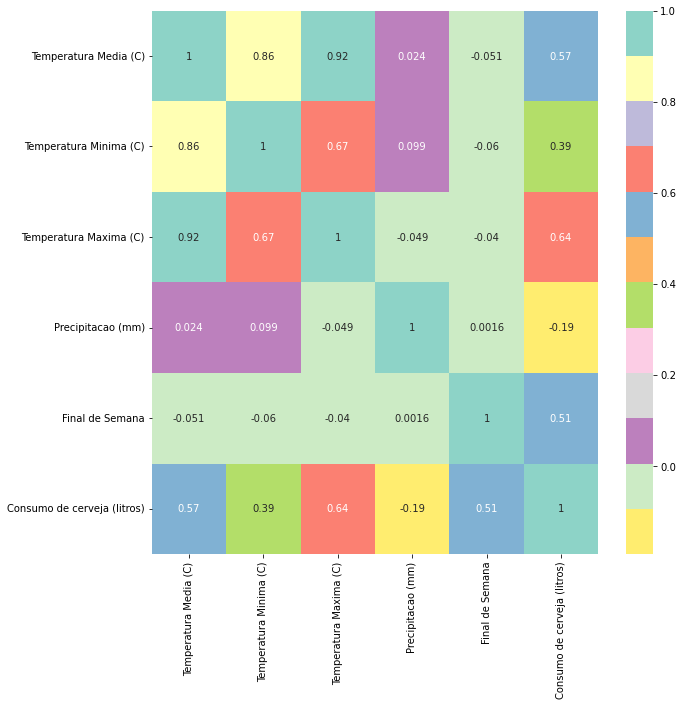

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix,annot=True,cmap="Set3_r")
plt.show()

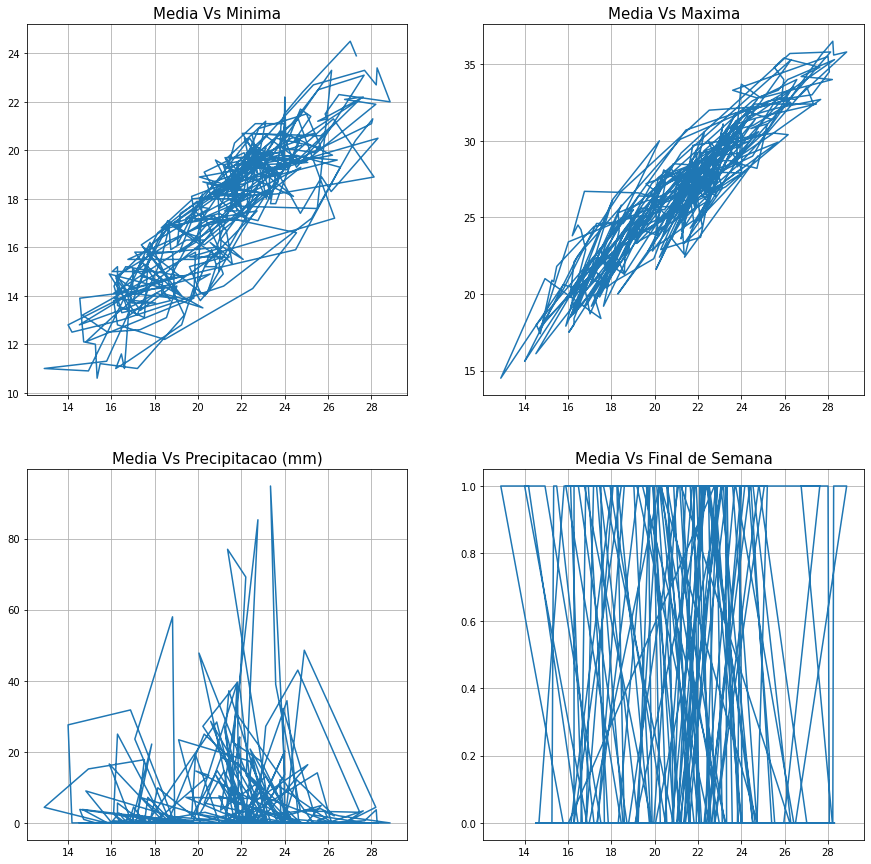

In [25]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title("Media Vs Minima",fontsize=15)
plt.plot(data["Temperatura Media (C)"],data["Temperatura Minima (C)"])
plt.grid(True)
plt.subplot(2,2,2)
plt.title("Media Vs Maxima",fontsize=15)
plt.plot(data["Temperatura Media (C)"],data["Temperatura Maxima (C)"])
plt.grid(True)
plt.subplot(2,2,3)
plt.title("Media Vs Precipitacao (mm)",fontsize=15)
plt.plot(data["Temperatura Media (C)"],data["Precipitacao (mm)"])
plt.grid(True)
plt.subplot(2,2,4)
plt.title("Media Vs Final de Semana",fontsize=15)
plt.plot(data["Temperatura Media (C)"],data["Final de Semana"])
plt.grid(True)
plt.show()

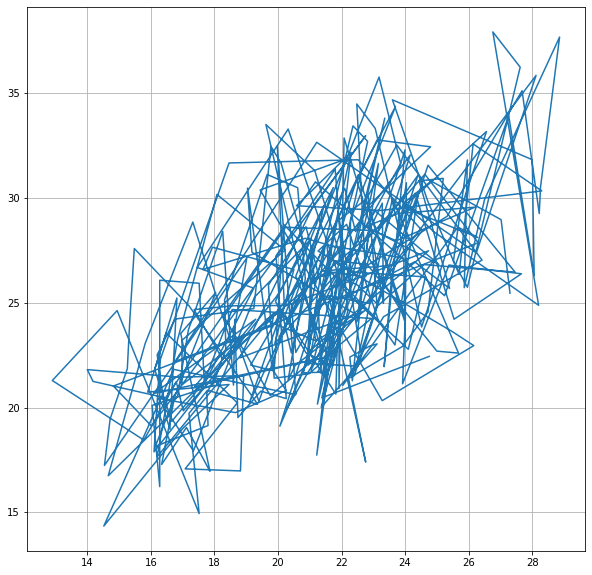

In [26]:
plt.figure(figsize=(10,10))
plt.plot(data["Temperatura Media (C)"],data["Consumo de cerveja (litros)"])
plt.grid(True)
plt.show()

# Pair Plot

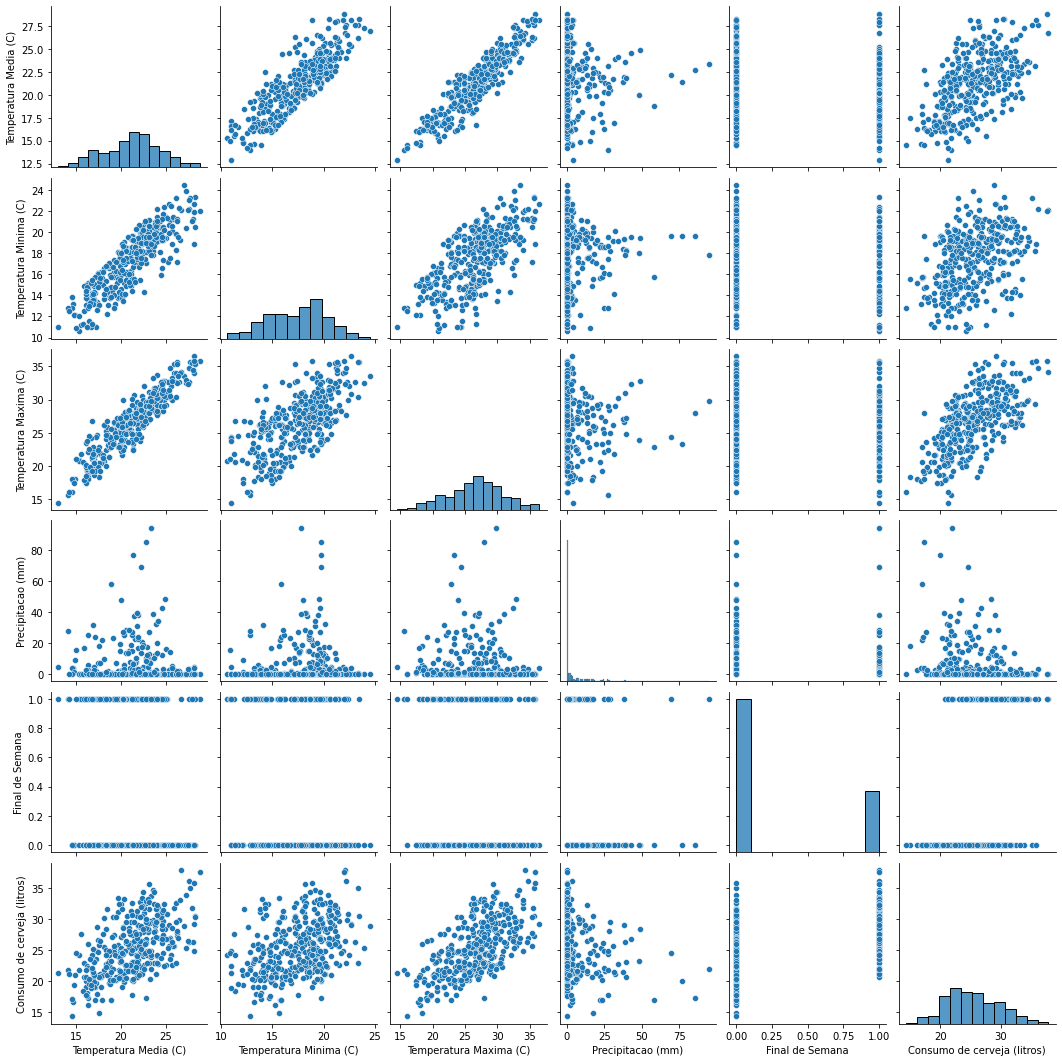

In [27]:
sns.pairplot(data)
plt.show()

# Histogram

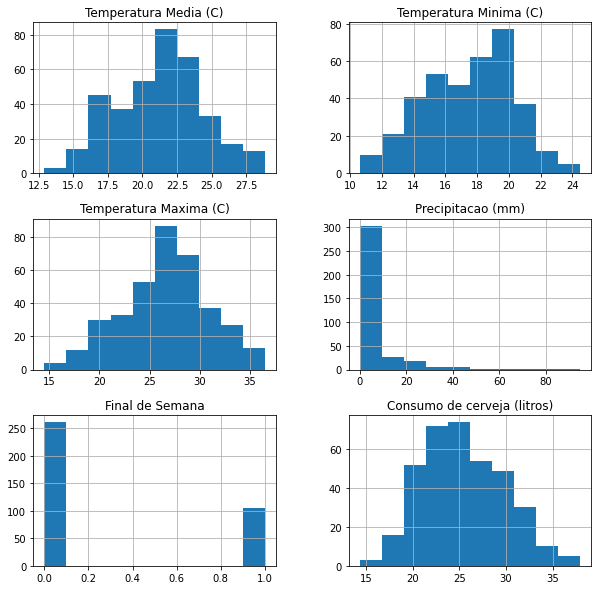

In [28]:
data.hist(figsize=(10,10))
plt.show()

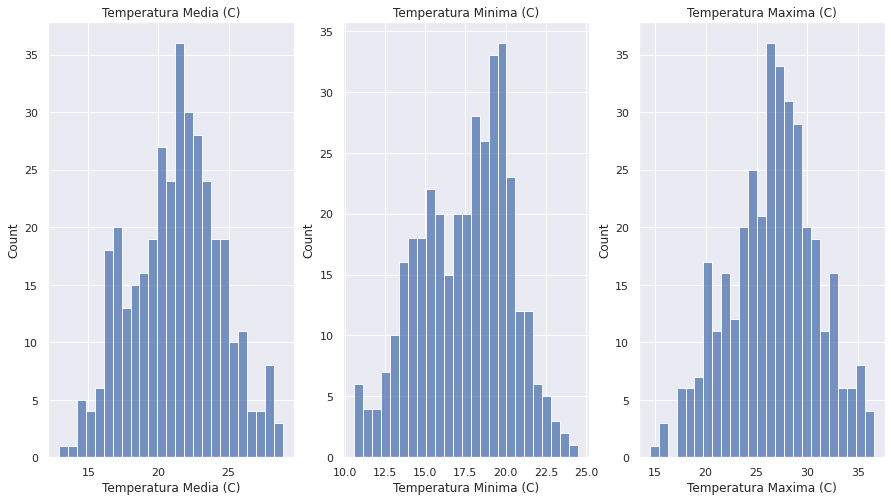

In [29]:
sns.set(style='darkgrid')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize=(15,8))
for name, ax in zip(['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)'], [ax1, ax2, ax3]):
    g = sns.histplot(data, x=name, bins=25, ax=ax).set(title=name)
    

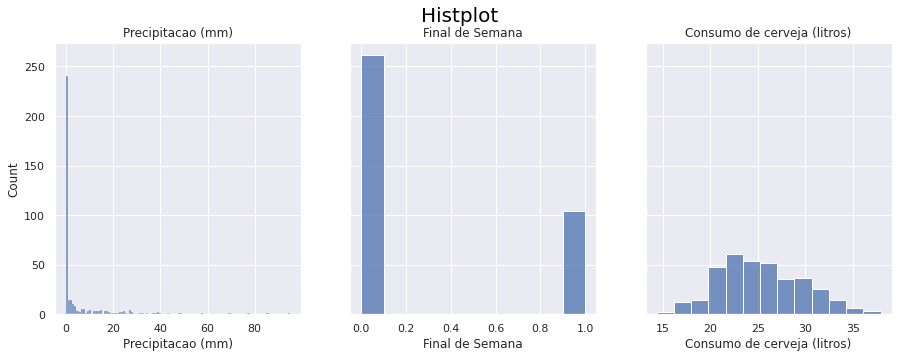

In [30]:
fig, ax = plt.subplots(1,3, figsize=(15, 5), sharey=True)
fig.suptitle('Histplot\n',fontsize=20,color="black")
print("\n")
sns.histplot(ax=ax[0], x="Precipitacao (mm)",data=data)
ax[0].set_title("Precipitacao (mm)")

sns.histplot(ax=ax[1], x="Final de Semana",data=data)
ax[1].set_title("Final de Semana")

sns.histplot(ax=ax[2], x="Consumo de cerveja (litros)",data=data)
ax[2].set_title("Consumo de cerveja (litros)")

plt.show()

In [31]:
data.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,27.30,23.9,32.5,0.0,0.0,25.461
1,27.02,24.5,33.5,0.0,0.0,28.972
2,24.82,22.4,29.9,0.0,1.0,30.814
3,23.98,21.5,28.6,1.2,1.0,29.799
4,23.82,21.0,28.3,0.0,0.0,28.900


In [32]:
train_data=data.drop("Consumo de cerveja (litros)",axis=1)

In [33]:
label_data=data["Consumo de cerveja (litros)"]

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(train_data,label_data,test_size=0.3,random_state=42)

In [35]:
model=LinearRegression()

In [36]:
model.fit(X_train,Y_train)

LinearRegression()

In [37]:
Y_test

193    25.640
33     31.655
15     29.938
309    20.575
57     26.241
        ...  
158    26.150
229    23.070
360    32.307
209    22.522
328    25.119
Name: Consumo de cerveja (litros), Length: 110, dtype: float64

In [38]:
pred=model.predict(X_test)

In [39]:
pred

array([25.60041023, 26.97117725, 28.15676471, 21.63976738, 27.27893434,
       17.9680884 , 22.52646043, 18.88477877, 18.11467917, 20.80744662,
       32.32692642, 26.88896613, 25.32979006, 25.59637121, 20.68308117,
       22.34253797, 28.16697846, 27.18762899, 24.68241004, 28.76007104,
       34.51946727, 21.63357198, 29.68883845, 19.13015069, 25.0991101 ,
       24.50233944, 29.09697601, 30.20736403, 22.9154664 , 24.15280354,
       24.33409764, 29.82119766, 28.44540146, 32.37941343, 23.53300127,
       27.18629236, 27.44602729, 23.5318631 , 25.28364412, 31.71735746,
       28.13496313, 32.12664352, 28.18234752, 24.72125899, 24.97014138,
       31.57879269, 24.7722412 , 24.85857339, 25.98995384, 29.23707777,
       28.90190825, 31.86458302, 31.45485689, 33.59757384, 20.1781985 ,
       25.74233252, 31.27095578, 30.75217967, 26.65798824, 24.20796489,
       22.42241174, 28.12085385, 24.59741966, 23.27735811, 29.32854549,
       29.611651  , 25.16289502, 19.76865493, 20.24552293, 23.93

# Accuracy Score

In [40]:
model.score(X_test,Y_test)

0.7437419586478451

# True Data Vs Predict Data

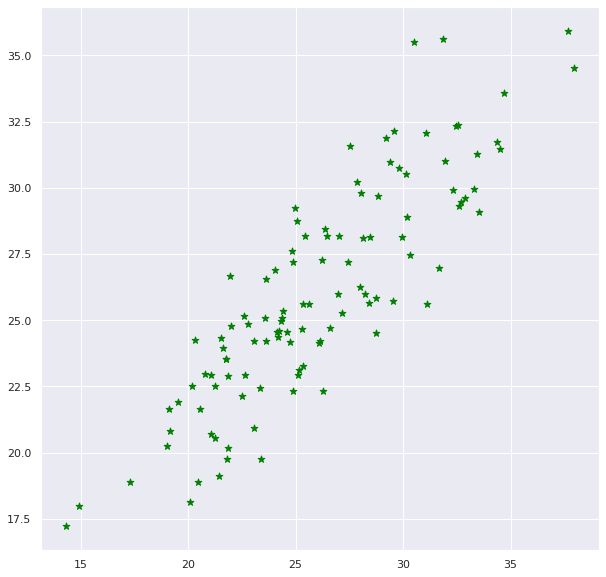

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test,pred,marker="*",color="green",s=50)
plt.show()

# Predict Data Vs Residual Data

In [42]:
residual_data=Y_test-pred

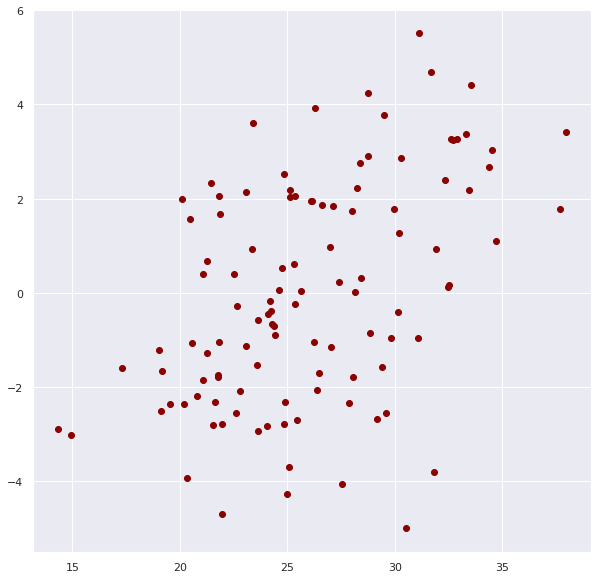

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test,residual_data,marker="o",color="darkred")
plt.show()

Normality Of Errors

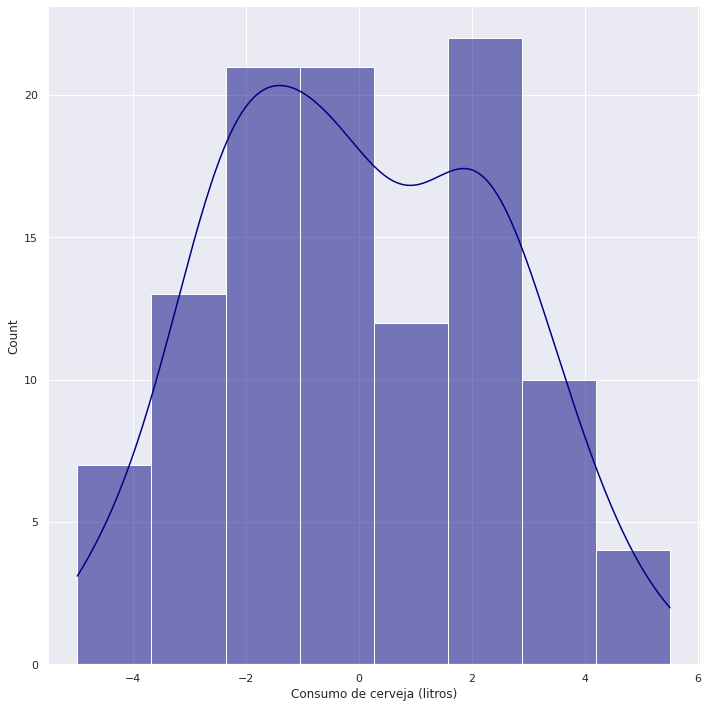

In [44]:
sns.displot(residual_data,kde=True,height=10,color="navy")
plt.show()

# R2_Score

In [45]:
r2_score(Y_test,pred)

0.7437419586478451

# Mean Squared Error

In [46]:
mean_squared_error(Y_test,pred)

5.5895320753639295

# Custom Data Prediction

In [47]:
new_data=np.array([[27.02,24.5,33.5,0.0,0.0]])
model.predict(new_data)

array([28.59846972])

In [48]:
new_data1=np.array([[27.52,24.56,63.5,0.0,0.0]])
model.predict(new_data1)

array([45.47021038])